<a href="https://colab.research.google.com/github/kshashank03/data-science-projects/blob/master/Classification_Models/detecting_heavy_drinking_using_motion_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (WORK IN PROGRESS) Using Accelerometer Data to Detect Heavy Drinking

## Library and Data Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob
import string
import warnings
from tqdm.notebook import tqdm

In [2]:
files = glob.glob("/content/drive/My Drive/Data Science/Detecting Heavy Drinking Episodes/data/clean_tac/*.csv")
TAC_data = None

for i, f in enumerate (files):
    if i == 0:
        TAC_data = pd.read_csv(f)
        TAC_data['Participant'] = f[86:92] + "_TAC"
    else:
        tmp = pd.read_csv(f)
        tmp['Participant'] = f[86:92] + "_TAC"
        TAC_data = TAC_data.append(tmp)


TAC_data['timestamp'] = TAC_data['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
TAC_data.head()

,timestamp,TAC_Reading,Participant
0,2017-05-02 09:18:43,-0.010229,SA0297_TAC
1,2017-05-02 09:49:06,-0.002512,SA0297_TAC
2,2017-05-02 09:54:23,0.003249,SA0297_TAC
3,2017-05-02 09:59:39,0.005404,SA0297_TAC
4,2017-05-02 10:04:55,0.003377,SA0297_TAC


## Visualization

In [3]:
TAC_data_pivot = TAC_data.copy()
TAC_data_pivot = TAC_data_pivot.pivot(index='timestamp', columns='Participant', values='TAC_Reading')
TAC_data_pivot.fillna(0, inplace=True)
TAC_data_pivot.columns

Index(['BK7610_TAC', 'BU4707_TAC', 'CC6740_TAC', 'DC6359_TAC', 'DK3500_TAC',
       'HV0618_TAC', 'JB3156_TAC', 'JR8022_TAC', 'MC7070_TAC', 'MJ8002_TAC',
       'PC6771_TAC', 'SA0297_TAC', 'SF3079_TAC'],
      dtype='object', name='Participant')

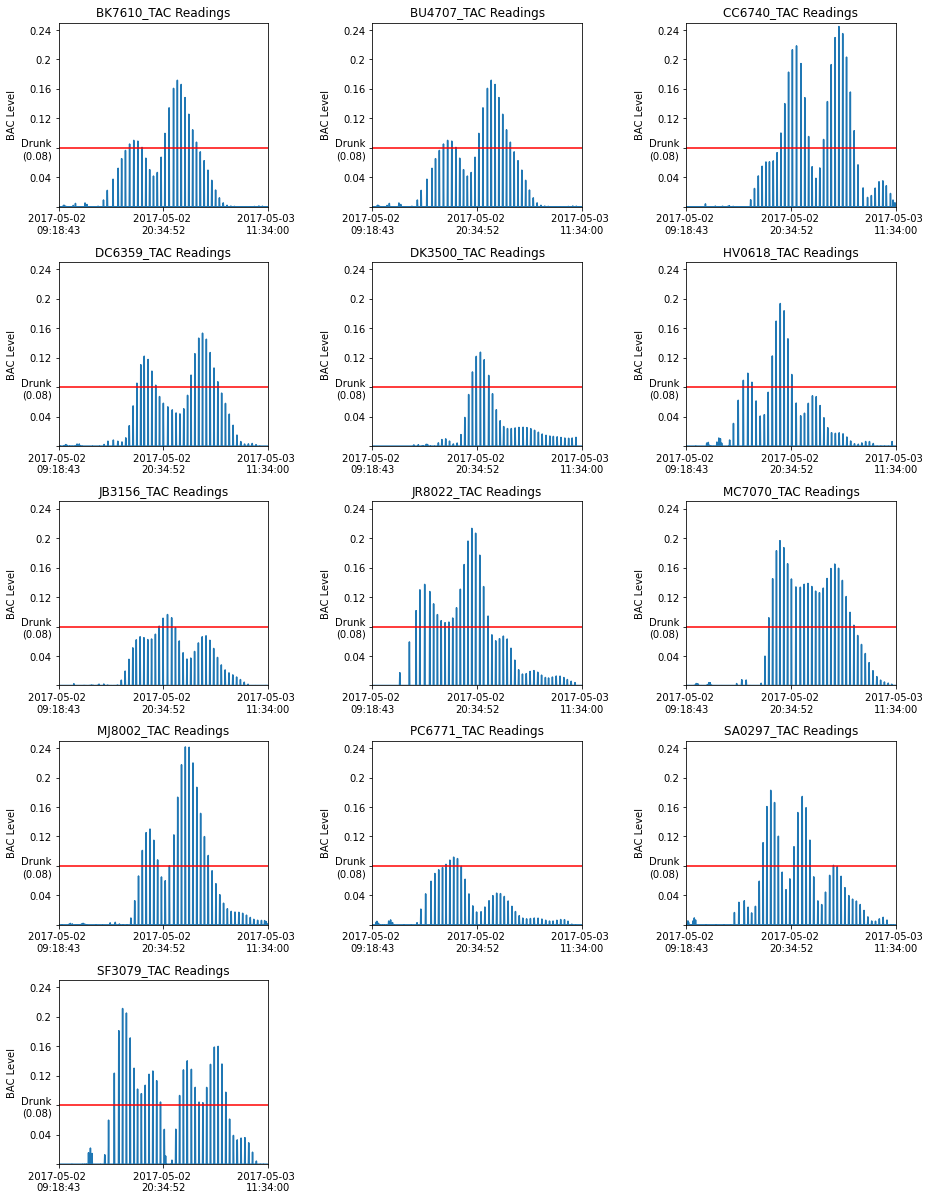

In [0]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(15, 21)).patch.set_facecolor('#FFFFFF')
x=1
date_min = TAC_data_pivot.index[0]
date_max = TAC_data_pivot.index[len(TAC_data_pivot.index)-1]
date_mid = TAC_data_pivot.index[len(TAC_data_pivot.index)/2]


for i in TAC_data_pivot.columns:
  plt.subplot(5, 3, x)
  plt.subplot(5, 3, x).set_xticks([0, len(TAC_data_pivot[i])/2, len(TAC_data_pivot[i])-1])
  plt.subplot(5, 3, x).set_xticklabels([date_min[:-8] + "\n" + date_min[-8:], date_mid[:-8] + "\n" + date_mid[-8:], date_max[:-8] + "\n" + date_max[-8:]])
  plt.subplot(5, 3, x).set_yticks([0.00, 0.04, 0.08, 0.12, 0.16, 0.20, 0.24])
  plt.subplot(5, 3, x).set_yticklabels(['', 0.04, 'Drunk\n(0.08)', 0.12, 0.16, 0.20, 0.24])
  plt.subplots_adjust(hspace=0.3, wspace=0.5)
  plt.plot(TAC_data_pivot[i])
  plt.plot(TAC_data_pivot.index, [0.08 for i in range(len(TAC_data_pivot.index))], color='r')
  plt.ylim(0.00, 0.25)
  plt.xlim(date_min, date_max)
  plt.ylabel('BAC Level')
  plt.title(i + " Readings")
  x+=1


In [4]:
accelerometer_data = pd.read_csv('/content/drive/My Drive/Data Science/Detecting Heavy Drinking Episodes/data/all_accelerometer_data_pids_13.csv')
accelerometer_data['time'] = accelerometer_data['time'].apply(lambda x: datetime.datetime.fromtimestamp(float(x/1000)).strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])
accelerometer_data.head()

,time,pid,x,y,z
0,1970-01-01 00:00:00.000,JB3156,0.0000,0.0000,0.0000
1,1970-01-01 00:00:00.000,CC6740,0.0000,0.0000,0.0000
2,2017-05-02 14:04:42.409,SA0297,0.0758,0.0273,-0.0102
3,2017-05-02 14:04:42.455,SA0297,-0.0359,0.0794,0.0037
4,2017-05-02 14:04:42.500,SA0297,-0.2427,-0.0861,-0.0163


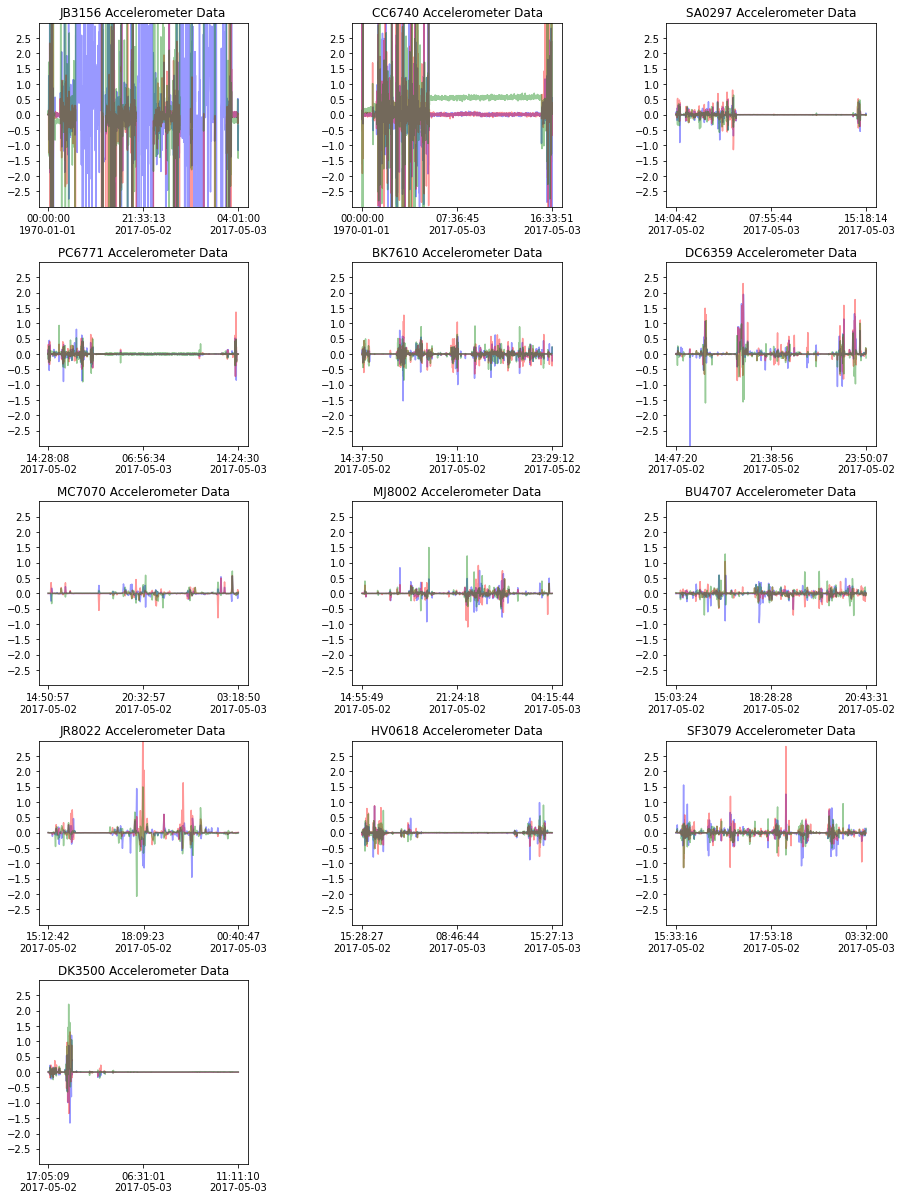

In [0]:
counter = 1
plt.figure(figsize=(15, 21)).patch.set_facecolor('#FFFFFF')

for i in tqdm(accelerometer_data['pid'].unique()):
  time = accelerometer_data[accelerometer_data['pid'] == i].iloc[::1000, 0]
  x = accelerometer_data[accelerometer_data['pid'] == i].iloc[::1000, 2]
  y = accelerometer_data[accelerometer_data['pid'] == i].iloc[::1000, 3]
  z = accelerometer_data[accelerometer_data['pid'] == i].iloc[::1000, 4]
  x_ticks = [0]
  if len(x)%2 == 1:
    x_ticks.append(int((len(x) - 1)/2))
    x_ticks.append(len(x))
  else:
    x_ticks.append(int(len(x)/2))
    x_ticks.append(len(x))
  x_ticks[2] = x_ticks[2] - 1 #We need to subtract 1 from the last value for it to used with iloc
  plt.subplot(5, 3, counter)
  plt.subplot(5, 3, counter).set_xticks(x_ticks)
  plt.subplot(5, 3, counter).set_xticklabels([x[11:19] + '\n' + x[:10] for x in time.iloc[x_ticks]])
  plt.subplot(5, 3, counter).set_yticks([-2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
  plt.ylim(-3.0, 3.0)
  plt.title(i + ' Accelerometer Data')
  plt.plot(time, x, color='b', alpha = 0.4, label='x')
  plt.plot(time, y, color='r', alpha = 0.4, label='y')
  plt.plot(time, z, color='g', alpha = 0.4, label='z')
  plt.subplots_adjust(hspace=0.3, wspace=0.5)
  counter +=1
plt.show()  

# Add an analysis of the visualizations

#Modeling

In [0]:
accelerometer_data = pd.read_csv('/content/drive/My Drive/Data Science/Detecting Heavy Drinking Episodes/data/all_accelerometer_data_pids_13.csv')

In [6]:
files = glob.glob("/content/drive/My Drive/Data Science/Detecting Heavy Drinking Episodes/data/clean_tac/*.csv")
TAC_data = None

for i, f in enumerate (files):
    if i == 0:
        TAC_data = pd.read_csv(f)
        TAC_data['Participant'] = f[86:92]
    else:
        tmp = pd.read_csv(f)
        tmp['Participant'] = f[86:92]
        TAC_data = TAC_data.append(tmp)
TAC_data.head()

,timestamp,TAC_Reading,Participant
0,1493716723,-0.010229,SA0297
1,1493718546,-0.002512,SA0297
2,1493718863,0.003249,SA0297
3,1493719179,0.005404,SA0297
4,1493719495,0.003377,SA0297


In [7]:
data_match = accelerometer_data.copy()
data_match = data_match[data_match['pid']=='MJ8002']
data_match['time'] = [str(round(x/1000)) for x in data_match['time']]

data_match = data_match.groupby(['time', 'pid']).mean().reset_index()
data_match.head()

,time,pid,x,y,z
0,1493736950,MJ8002,0.000086,0.001046,-0.004384
1,1493736951,MJ8002,-0.000457,0.000803,-0.003990
2,1493736952,MJ8002,-0.000730,0.000853,-0.004407
3,1493736953,MJ8002,-0.000515,0.000755,-0.004777
4,1493736954,MJ8002,-0.000690,0.000700,-0.004540


In [8]:
data_match_TAC = TAC_data[TAC_data['Participant'] == 'MJ8002']
data_match_TAC['timestamp'] = data_match_TAC['timestamp'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#Creating classification dataset

In [9]:
#Drop TAC values that are outside the range of the Accelerometer data
classification_data = pd.DataFrame(columns=['time', 'pid', 'x', 'y', 'z', 'TAC_Reading', 'drunk'])

for i in tqdm(TAC_data['Participant'].unique()):
  data_match = accelerometer_data.copy()
  data_match = data_match[data_match['pid']==i]
  data_match['time'] = [str(round(x/1000)) for x in data_match['time']]

  data_match = data_match.groupby(['time', 'pid']).mean().reset_index()

  data_match_TAC = TAC_data[TAC_data['Participant'] == i]
  data_match_TAC['timestamp'] = data_match_TAC['timestamp'].astype(str)

  data_match_TAC = data_match_TAC[(data_match_TAC['timestamp'] >= min(data_match['time'])) & \
                                  (data_match_TAC['timestamp'] <= max(data_match['time']))] 

  merged_data = data_match.merge(data_match_TAC, how='outer' , left_on='time', right_on='timestamp')
  merged_data['time'].fillna(merged_data['timestamp'], inplace=True)
  merged_data['pid'].fillna(merged_data['Participant'], inplace=True)
  merged_data.drop(['timestamp', 'Participant'], axis=1, inplace=True)
  merged_data.sort_values(by=['time'], inplace=True)
  merged_data['x'].fillna(method='ffill', inplace=True)
  merged_data['y'].fillna(method='ffill', inplace=True)
  merged_data['z'].fillna(method='ffill', inplace=True)
  merged_data['TAC_Reading'].fillna(method='ffill', inplace=True)
  merged_data['TAC_Reading'].fillna(method='bfill', inplace=True)
  merged_data['drunk'] = merged_data['TAC_Reading'].apply(lambda x: 1 if x>=0.08 else 0)
  classification_data = pd.concat([classification_data, merged_data])


classification_data.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,x,y,z,TAC_Reading
count,369490.000000,3.694900e+05,3.694900e+05,369490.000000
mean,-0.007462,-5.796441e+06,5.796440e+06,0.048860
std,0.667201,3.185464e+07,3.185464e+07,0.054465
min,-17.474937,-1.809008e+08,-1.633487e+01,-0.028308
25%,-0.002508,-1.079352e-03,-2.790183e-03,0.006193
50%,-0.000155,-5.000000e-06,4.325000e-03,0.035549
75%,0.002697,3.357500e-03,1.141500e-02,0.076462
max,13.951130,1.711171e+01,1.809008e+08,0.244715


In [10]:
classification_data.head()

,time,pid,x,y,z,TAC_Reading,drunk
0,1493733882,SA0297,-0.067600,0.006867,-0.007600,0.032672,0
1,1493733884,SA0297,-0.018884,-0.002760,-0.005598,0.032672,0
2,1493733885,SA0297,0.000014,-0.002159,-0.003377,0.032672,0
3,1493733886,SA0297,0.002155,-0.002227,-0.003859,0.032672,0
4,1493733887,SA0297,0.008182,0.010491,-0.006095,0.032672,0


# X-Y Split and Train-Test Split

In [13]:
model_dataset = classification_data.copy()

model_dataset = model_dataset[(model_dataset['pid'] != 'JB3156') & (model_dataset['pid'] != 'CC6740')] #Users with bad Accelerometer data

x = model_dataset.iloc[:, [2, 3, 4]].values
y = model_dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(x_train, '\n\n', x_test, '\n\n', y_train, '\n\n', y_test)

[[-6.77179487e-03 -7.72820513e-03 -6.98974359e-03]
 [-2.81578947e-04  3.31842105e-03  3.48684211e-03]
 [-4.17073171e-04  1.21951220e-05 -1.92439024e-03]
 ...
 [-2.07500000e-04  7.75000000e-05  6.42250000e-03]
 [-2.33000000e-03 -2.47500000e-04  6.49000000e-03]
 [-1.87500000e-04  7.50000000e-06  5.79250000e-03]] 

 [[ 0.0016075   0.00253    -0.003275  ]
 [-0.00287    -0.00093     0.0016025 ]
 [-0.00105    -0.00049091 -0.00482727]
 ...
 [ 0.00334615  0.00076667  0.00410256]
 [ 0.000945   -0.015725    0.02969   ]
 [-0.0033375  -0.0005625   0.004455  ]] 

 [0 0 0 ... 0 0 0] 

 [1 0 0 ... 0 1 0]


#Value Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

x_train = scl.fit_transform(x_train)
x_test = scl.fit_transform(x_test)

print(x_train, '\n\n', x_test)

[[-0.11897816 -0.23275719 -0.17361002]
 [-0.0050875  -0.04210678  0.02813126]
 [-0.00746516 -0.09916795 -0.07606957]
 ...
 [-0.00378756 -0.09804087  0.08466145]
 [-0.0410333  -0.10364995  0.08596126]
 [-0.0034366  -0.09924898  0.07252992]] 

 [[ 0.03370474 -0.05769611 -0.10722586]
 [-0.04472362 -0.11692402 -0.01167449]
 [-0.01284431 -0.1094077  -0.13763524]
 ...
 [ 0.06415918 -0.08788066  0.03730235]
 [ 0.02210032 -0.37018324  0.53856622]
 [-0.0529124  -0.11063319  0.04420665]]


#Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0)

log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(cm)

accuracy_score(y_test, y_pred)

[[42814    97]
 [13804    81]]


0.7552468483696035

#K Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(cm)

accuracy_score(y_test, y_pred)

[[36554  6357]
 [ 7459  6426]]


0.7567434326361011

#Support Vector Classifier

In [0]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=0)

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(cm)

accuracy_score(y_test, y_pred)

#Naive Bayes Classifier

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[41986   925]
 [13372   513]]


0.7482745263750968

#Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[37406  5505]
 [ 7650  6235]]


0.7683815761673357